# Задание 2

Используя методы дихотомии, простых итераций и Ньютона, найти уровень энергии E
основного состояния квантовой частицы в прямоугольной потенциальной яме
$$-\frac{1}{2} {\psi}''(x) + U(x)\psi(x) = E\psi(x),\;\;\;U(x) = \left\{\begin{matrix}
-U_{0}, |x| \leqslant  a,
\\ 
0, |x| > a
\end{matrix}\right.$$

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [17]:
err = 1e-4
l = 1
m = 1
h = 1
U0 = 1

Запишем нашу функцию и ее производную

In [25]:
A = 2*l*l*m/(h*h)

def f(E):
    return tan(E)
 #   xi = - E / U0
  #  return 1 / tan(sqrt(A * U0 * (1 - xi))) - sqrt(1 / xi - 1)

def df(E):
    return 1 / cos(E) / cos(E)
#    xi = - E / U0
#    k = sqrt(A * U0 * (1 - xi))
#    return -A/2 * (1 / pow(sin(k), 2) / k) + 1 / (2 * xi * E * sqrt(1 / xi - 1))

Построим график функции

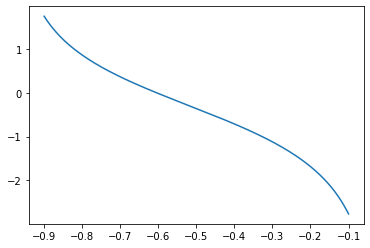

In [16]:
x = np.linspace(-0.9, -0.1, 1000)
f2 = np.vectorize(f)
plt.plot(x, f2(x))
plt.show()

Создадим методы нахождения корня уравнения

In [5]:
def Dihotomy(a, b):
    loss = []
    a = min(a, b)
    b = max(a, b)
    if f(a) * f(b) > 0 :
        print("Incorect parameters")
        return
    cnt = 1
    loss.append((b - a) / 2)
    while((b - a) / 2 > err):
        middle = (a + b) / 2
        cnt += 1
        if (f(a) * f(middle) < 0):
            b = middle
        else:
            a = middle
        loss.append((b - a) / 2)
    return middle, cnt, loss

In [44]:
def Iteration(x_0):
    loss = []
    p = []
    l = 1 / df(x_0)
    cnt = 1
    old_x = x_0
    new_x = old_x - l * f(old_x)
    p.append(old_x)
    p.append(new_x)
    loss.append(abs(new_x - old_x))
    while(abs(new_x - old_x) > err):
        old_x = new_x
        new_x = old_x - l* f(old_x)
        p.append(new_x)
        loss.append(abs(new_x - old_x))
        cnt += 1
    return new_x, cnt, loss, p

In [55]:
def Newton(x_0):
    cnt = 1
    loss = []
    p = []
    old_x = x_0
    new_x = old_x - (f(old_x) / df(old_x))
    p.append(old_x)
    p.append(new_x)
    loss.append(abs(new_x - old_x))
    while(abs(new_x - old_x) > err):
        old_x = new_x
        new_x = old_x - f(old_x) / df(old_x)
        p.append(new_x)
        loss.append(abs(new_x - old_x))
        cnt += 1
    return new_x, cnt, loss, p

In [28]:
# Возьмем интервал
a = 2
b = 10

# Сделаем смещение чтобы избежать деления на ноль и взятия корня от отрицательного числа
offset = 1e-7
a = a + offset
b = b - offset

# Возьмем начальное приближение корня (Возможно не правильно !!!)
x_0 = (a + b) / 2

In [9]:
N = log10((b - a) / (2 * err)) / log10(2)
print('Ожидаемое число итераций:', round(N))

Ожидаемое число итераций: 32


Корень уравнения: 9.424682531570436  Количество итерций: 17


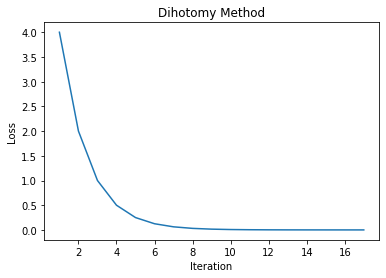

In [29]:
root, iteration, loss = Dihotomy(a, b)
print('Корень уравнения:', root, ' Количество итерций:', iteration)
plt.plot(range(1, iteration + 1), loss)
plt.title('Dihotomy Method')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Интересно исследовать как зависят количество итераций от заданной точности

In [11]:
def N(e):
    return log10((b - a) / (2 * e)) / log10(2)

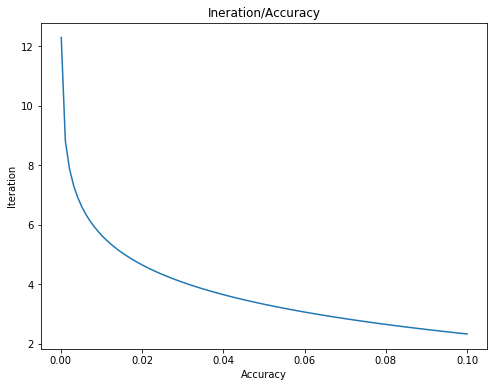

In [19]:
e = np.linspace(0.1, 1e-4, 100)
Nf = np.vectorize(N)
plt.figure(figsize=(8, 6))
plt.plot(e, Nf(e))
plt.title('Ineration/Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Iteration')
plt.show()

Корень уравнения: 3.1411920505665885  Количество итерций: 40


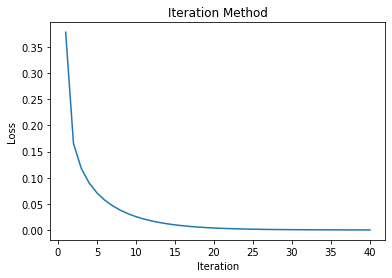

In [59]:
root, iteration, loss, p = Iteration(2)
print('Корень уравнения:', root, ' Количество итерций:', iteration)
plt.plot(range(1, iteration + 1), loss)
plt.title('Iteration Method')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

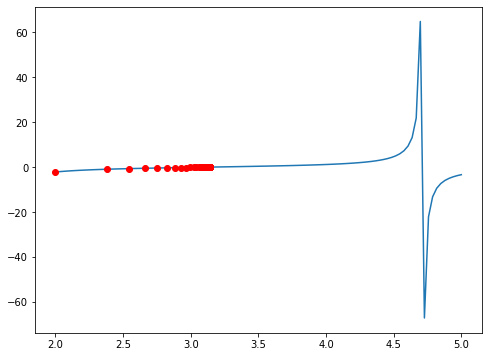

In [49]:
x = np.linspace(2, 5, 100)
f2 = np.vectorize(f)
plt.figure(figsize=(8, 6))
plt.plot(x, f2(x), label = 'Tan')
plt.plot(p, f2(p),'o', label = 'Iter', color = 'r')
plt.show()

Корень уравнения: 3.141592653589793  Количество итерций: 5


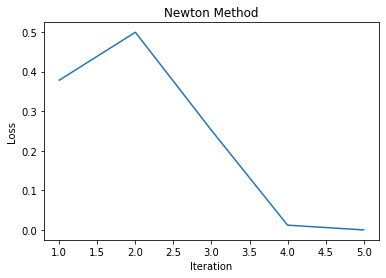

In [56]:
root, iteration, loss, p = Newton(2)
print('Корень уравнения:', root, ' Количество итерций:', iteration)
plt.plot(range(1, iteration + 1), loss)
plt.title('Newton Method')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

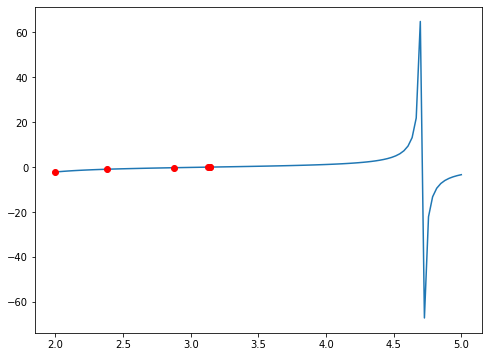

In [57]:
x = np.linspace(2, 5, 100)
f2 = np.vectorize(f)
plt.figure(figsize=(8, 6))
plt.plot(x, f2(x), label = 'Tan')
plt.plot(p, f2(p),'o', label = 'Iter', color = 'r')
plt.show()

In [58]:
print(p)

[2, 2.378401247653964, 2.877908188634054, 3.1295389327164505, 3.1415914860827425, 3.141592653589793]
